# Ürün Kümeleme ve Ürün Analizi

### Rastgele Ürün Verisi Oluşturma

Ürün Adı, Fiyat, Ortalama Puan, Mensei

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

In [86]:
np.random.seed(42)
num_samples = 100
fiyat = np.random.uniform(10,100, num_samples)
ortalama_puan=np.random.uniform(1,5,num_samples)
mensei= np.random.choice(["Ulke_A","Ulke_B","Ulke_C","Ulke_D"],num_samples)
urun_adi = [f"Urun_{i}" for i in range(num_samples)]

data = pd.DataFrame({
    "urun_adi": urun_adi,
    "fiyat": fiyat,
    "ortalama_puan": ortalama_puan,
    "mensei": mensei  
})

In [88]:
data.head(10)

,urun_adi,fiyat,ortalama_puan,mensei
0,Urun_0,43.708611,1.125717,Ulke_D
1,Urun_1,95.564288,3.545642,Ulke_D
2,Urun_2,75.879455,2.257424,Ulke_C
3,Urun_3,63.879264,3.034283,Ulke_A
4,Urun_4,24.041678,4.630266,Ulke_D
5,Urun_5,24.039507,1.997169,Ulke_D
6,Urun_6,15.227525,2.641532,Ulke_B
7,Urun_7,87.955853,4.022205,Ulke_D
8,Urun_8,64.100351,1.915193,Ulke_D
9,Urun_9,73.726532,1.307920,Ulke_B


### Temel Veri Analizi

In [91]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fiyat,100.0,52.316267,26.774047,10.496991,27.388068,51.772821,75.718281,98.819824
ortalama_puan,100.0,2.991327,1.172445,1.027809,1.968018,3.022499,4.064734,4.942602


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   urun_adi       100 non-null    object 
 1   fiyat          100 non-null    float64
 2   ortalama_puan  100 non-null    float64
 3   mensei         100 non-null    object 
dtypes: float64(2), object(2)
memory usage: 3.3+ KB


##### Fiyat ve Ortalama Puan Dağılımı

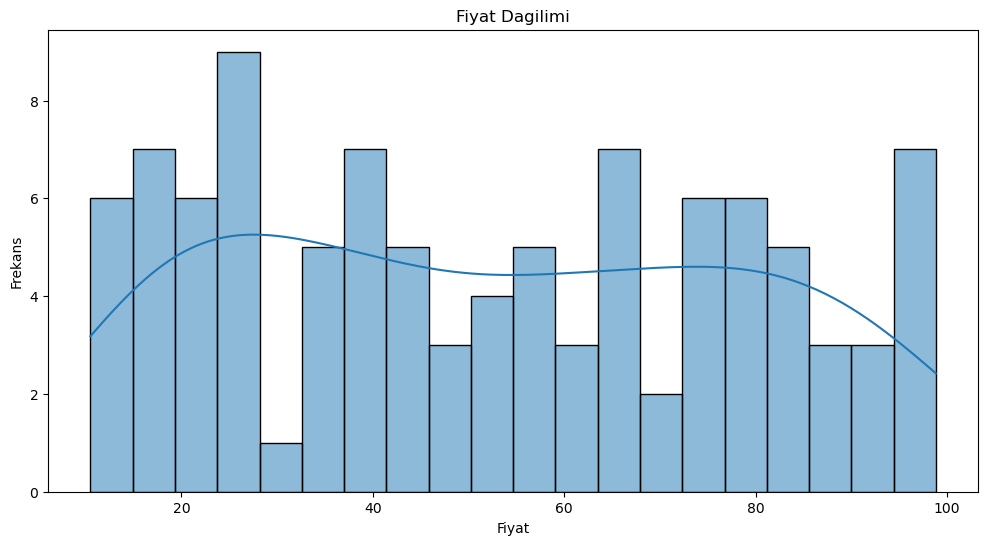

In [99]:
plt.figure(figsize=(12,6))
sns.histplot(data.fiyat,bins=20,kde=True)
plt.title("Fiyat Dagilimi")
plt.xlabel("Fiyat")
plt.ylabel("Frekans")
plt.show()

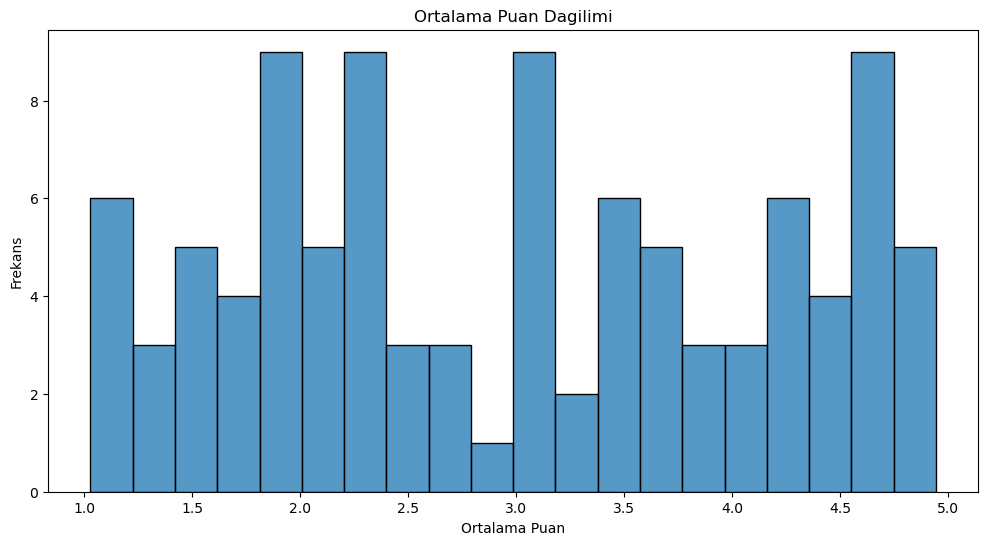

In [101]:
plt.figure(figsize=(12,6))
sns.histplot(data.ortalama_puan, bins=20, kde=False)
plt.title("Ortalama Puan Dagilimi")
plt.xlabel("Ortalama Puan")
plt.ylabel("Frekans")
plt.show()

##### Fiyat ve Ortalama Puan Arasındaki İlişki

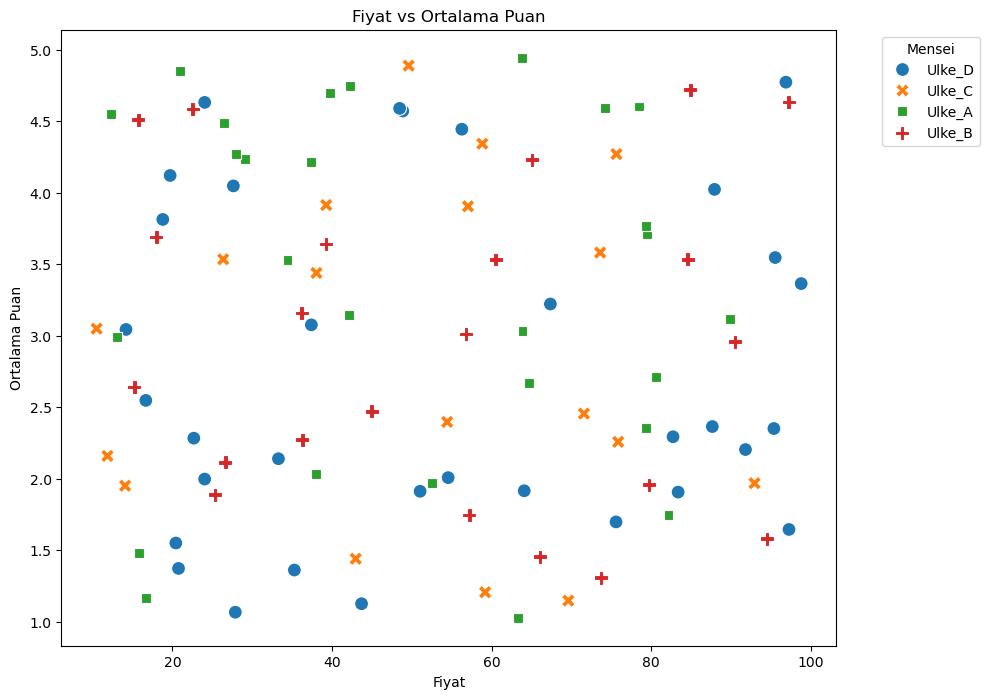

In [116]:
plt.figure(figsize=(10,8))
sns.scatterplot(x= "fiyat", y="ortalama_puan", data=data, hue="mensei", style="mensei", s=100)
plt.title("Fiyat vs Ortalama Puan")
plt.xlabel("Fiyat")
plt.ylabel("Ortalama Puan")
plt.legend(title="Mensei", loc="upper left", bbox_to_anchor=(1.05, 1))
plt.show()

##### Fiyatların Mensei Göre Dağılımı


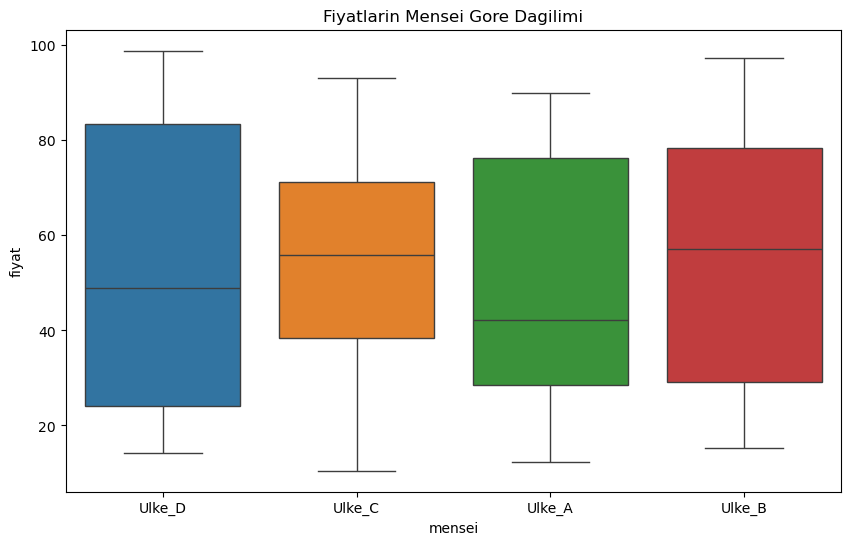

In [125]:
plt.figure(figsize=(10,6))
sns.boxplot(x="mensei", y="fiyat", data=data, hue="mensei")
plt.title("Fiyatlarin Mensei Gore Dagilimi")
plt.xlabel("mensei")
plt.ylabel("fiyat")
plt.show()

##### Ortalama Puanların Mensei Göre Dağılımı

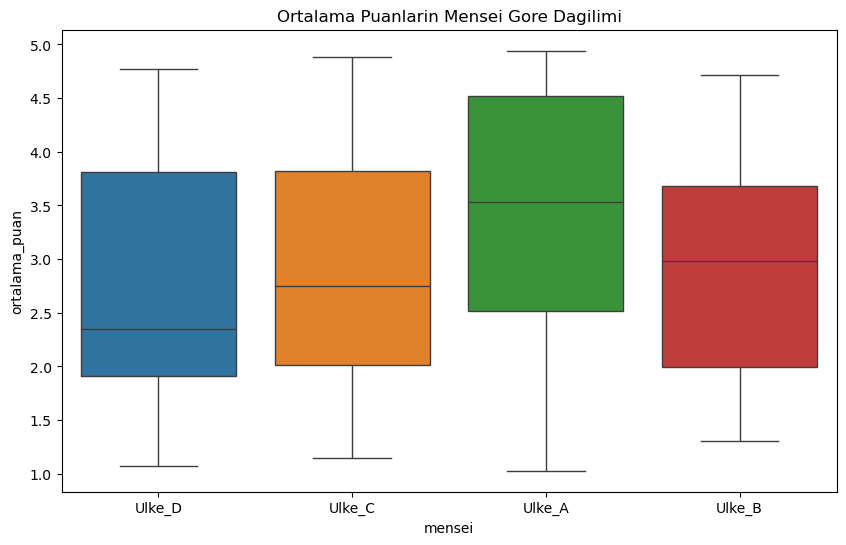

In [132]:
plt.figure(figsize=(10,6))
sns.boxplot(x = "mensei" ,y="ortalama_puan", data=data, hue="mensei")
plt.title("Ortalama Puanlarin Mensei Gore Dagilimi")
plt.xlabel("mensei")
plt.ylabel("ortalama_puan")
plt.show()

### Kmeans Kümeleme ve t-SNE Görselleştirme

In [136]:
X = data[["fiyat","ortalama_puan"]].values

In [142]:
kmeans = KMeans(n_clusters =4, random_state=42)
data["kume"]=kmeans.fit_predict(X)

C:\Users\saygi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


##### T-SNE Görselleştirme

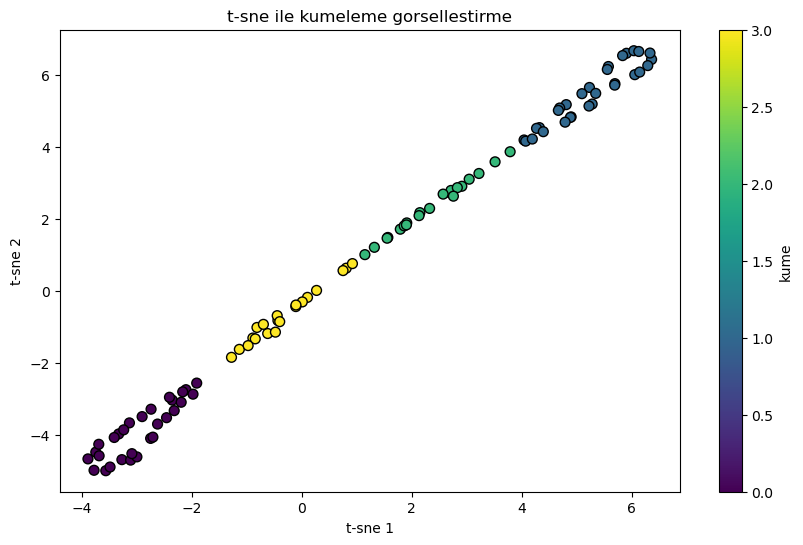

In [169]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
plt.figure(figsize=(10,6))
plt.scatter(X_tsne[:,0],X_tsne[:,1], c=data["kume"], cmap="viridis", marker="o", edgecolor="black", s=50)
plt.title("t-sne ile kumeleme gorsellestirme")
plt.xlabel("t-sne 1")
plt.ylabel("t-sne 2")
plt.colorbar(label="kume")
plt.show()

### Dendrogram ile Görselleştirme

In [ ]:
linkage_matrix = linkage(X, method="ward")
plt.figure()
dendrogram(linkage_matrix)
plt.title("Dendrogram"